[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
  1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 

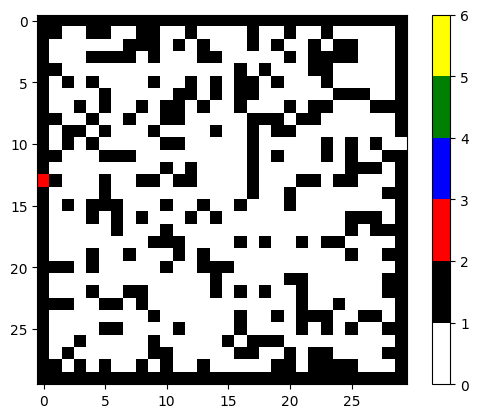

In [1]:
import numpy as np
import random as rd
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 递归加深度优先遍历
sys.setrecursionlimit(10000)


class Labyrinth:
    """生成一个稀疏矩阵,作为一个迷宫"""
    def __init__(self, rows, cols, sparsity):
        """
        初始化一个0 1 构成的矩阵,0为路径,1为墙壁,同时为这个矩阵添加出入口,以列表表示
        :param rows: 矩阵行数
        :param cols: 列数
        :param sparsity: 稀疏程度,越大越稀疏
        """
        # 生成一个全零矩阵
        self.matrix = np.zeros((rows, cols))
        # 生成一个掩码，根据稀疏程度将部分元素置为1
        mask = np.random.rand(rows, cols) > sparsity
        self.matrix[mask] = 1
        # 为迷宫添加墙壁
        self.matrix[-1, :] = 1
        self.matrix[:, -1] = 1
        self.matrix[0, :] = 1
        self.matrix[:, 0] = 1
        # 为矩阵添加出入口
        self.enter_row = rd.randint(1, rows - 2)
        self.exit_row = rd.randint(1, rows - 2)
        self.matrix[self.enter_row, 0] = 0
        self.matrix[self.exit_row, -1] = 0
        self.enter = [self.enter_row, 0]
        self.exit = [self.exit_row, cols - 1]
        del mask, self.enter_row, self.exit_row

    def __str__(self):
        return np.array2string(self.matrix)


class Turtle:
    def __init__(self, mar):
        """
        初始化海龟的初始位置,起点,所在的位置,所在位置的值,并初始化一个记录海龟路径的栈
        :param mar: 传入的迷宫矩阵
        """
        self.mar = mar.matrix
        self.start = mar.enter
        self.exit = mar.exit
        self.position = self.start.copy()
        self.path = []
        self.path.append(self.position)

    @property
    def value(self):
        return self.mar[tuple(self.position)]

    @value.setter
    def value(self, value=1):
        self.mar[tuple(self.position)] = value

    def position(self):
        return self.position

    def set_position(self, direction):
        """ 0 1 2 3 代表上下左右"""
        row, col = self.position
        if direction == 0:
            self.position = [row - 1, col]
        elif direction == 1:
            self.position = [row + 1, col]
        elif direction == 2:
            self.position = [row, col - 1]
        elif direction == 3:
            self.position = [row, col + 1]

    def is_position_available(self, direction):
        """判断路径是否可以通行,如果可以则返回True,反之则为False
        0 1 2 3 代表上下左右"""

        row, col = self.position
        if direction == 0 and row > 1 and self.mar[row - 1, col] < 0.5:
            return True
        elif direction == 1 and row < self.mar.shape[0] - 2 and self.mar[row + 1, col] < 0.5:
            return True
        elif direction == 2 and col > 1 and self.mar[row, col - 1] < 0.5:
            return True
        elif direction == 3 and self.mar[row, col + 1] < 0.5:  # 这里可能涉及到迷宫的出口,需要特别注意
            return True

    # 这个海龟有点蠢
    def move(self):
        # 碰到出口
        if self.position == self.exit:
            self.value = 6
            print("找到出口")
            return True
        if self.value == 0:
            self.value = 2  # 标记地点
        # 依次尝试上下左右四个方向
        found, direction = None, None # 初始化不同方向的寻找路径状态
        for _direction in [0, 1, 2, 3]:
            if self.is_position_available(_direction):
                found, direction = self.is_position_available(_direction), _direction
        if found:
            self.set_position(direction)
            print(self.position)
            self.path.append(self.position)  # 标记当前地点
            self.value = 2
            # 如果成功找到出口，返回True
            if self.move():  # 递归地尝试继续走
                return True
            # 如果继续走没有找到出口，回溯继续找
            else:
                self.position = self.path.pop(-1)
                print(self.position)
                if len(self.path) == 0:
                    print("寻找出口失败")
                    return False
                elif self.move():
                    return True
        else:
            print("没有找到路径,尝试回溯")
            if len(self.path) == 1:
                print("已经到达出口,无法回溯,尝试失败")
                return False
    def __str__(self):
        return np.array2string(self.mar)


def plot_labyrinth(matrix):
    # 定义颜色映射
    cmap = mcolors.ListedColormap(['white', 'black', 'red', 'blue', 'green', 'yellow'])
    bounds = [0, 1, 2, 3, 4, 5, 6]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    plt.imshow(matrix, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6])
    plt.show()


'''对于非连通的迷宫,深度优先遍历有可能陷入死胡同,因此不是一个很好地解决迷宫问题的工具
 由于我们生成的迷宫不总是有解,所以我设置的一旦回到根节点就结束递归是不得已的.如果一定有解,那么回到根节点后,
 应该回到上一个节点重新进行递归调用'''

if __name__ == '__main__':
    labyrinth = Labyrinth(30, 30, 0.7)
    print(labyrinth)
    turtle = Turtle(labyrinth)
    turtle.move()
    print(turtle)
    plot_labyrinth(turtle.mar)
